In [ ]:
import numpy as np
import time

In [ ]:
#Setup an input matrix for testing
n = 10
A = np.random.randint(0,100,(n,n))

In [ ]:
A

array([[26,  6, 60, 85, 36, 94, 86, 19, 81, 98],
       [43, 98, 88, 17, 60, 89,  4, 33, 22, 21],
       [42, 24, 60,  6, 32, 63, 92, 12, 41, 34],
       [45, 40, 20, 68, 73, 85, 52, 71, 15, 50],
       [67, 67, 59, 33, 82, 93, 35, 78, 88, 22],
       [29, 24, 93, 70, 20, 26, 95, 22, 15, 28],
       [40,  5, 51, 29, 41, 53, 79, 36, 51, 29],
       [19, 90, 52, 70, 80, 39, 58, 93, 46, 37],
       [55, 89, 52, 15, 23, 92, 61, 86, 65, 31],
       [13, 57, 67, 30, 77, 17, 88, 77, 13, 13]])

In [ ]:
#1D peak finding
def binarypeak(a,n):
  if n == 1:
    return a[0]
  
  if n % 2 == 0:
    mid = int(n/2)
  else:
    mid = int((n+1)/2)
  
  #print('Arguments',mid,a[mid-2],a[mid-1],a[mid])
  if a[mid-1] < a[mid - 2]:
    #print('Passing to next level',a[:mid])
    return binarypeak(a[:mid],len(a[:mid]))
  elif a[mid-1] < a[mid]:
    #print('Passing to next level',a[mid:])
    return binarypeak(a[mid:],len(a[mid:]))
  else:
    return a[mid-1]

In [ ]:
#Verify Function to use binary partions and find a peak
binarypeak(A[5,:],10)

93

In [ ]:
size=1000
B = np.zeros((200,size))
#Plot performance of binary search
for i in range(size-1):
  count = 0
  for n in range(10,10000,50):
    A = np.random.randint(0,100,n)
    start = time.time()
    #print(A,n)
    binarypeak(A,n)
    end = time.time()
    B[count,0] = n
    B[count,i+1] = end-start
    count = count+1

In [ ]:
B.shape

(200, 1000)

In [ ]:
C = np.zeros((200,2))
C[:,0] = B[:,0]
C[:,1] = np.mean(B[:,1:size-1],axis=1)*1000

Text(0.5, 1.0, '1D Peak Finding: log worst case performance growth')

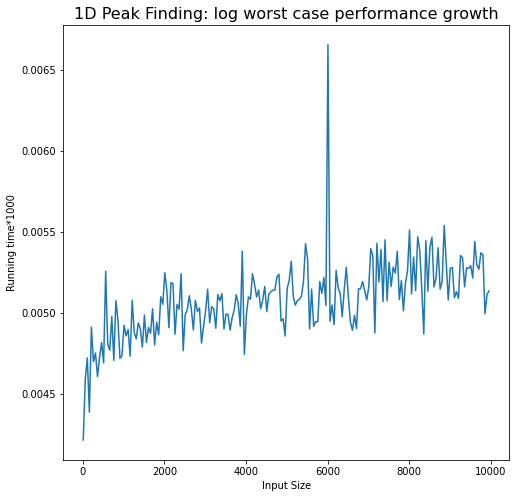

In [ ]:
#Plot Performance vs Input Size
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(C[:,0],C[:,1])
plt.xlabel('Input Size')
plt.ylabel('Running time*1000')
plt.title('1D Peak Finding: log worst case performance growth',fontsize=16)

In [ ]:
#Implement 2D peak finding
def peak2D(a,nrow,ncol):
  if ncol == 1:
    return np.max(a,axis=1)

  if ncol % 2 == 0:
    mid = int(ncol/2)
  else:
    mid = int((ncol+1)/2)
  
  r = 4
  c = mid-1
  #print('arg1',ncol,c,a[:,c])
  rnew = np.argmax(a[:,c])
  #print('arguments',r,c,rnew)
  #print('arguments',a[rnew,c-1],a[rnew,c],a[rnew,c+1])
  if a[rnew,c] < a[rnew,c-1]:
    #print('Passing to next level',a[:,:c+1])
    return peak2D(a[:,:c+1],a[:,:c+1].shape[0],a[:,:c+1].shape[1])
  elif a[rnew,c] < a[rnew,c+1]:
    #print('Passing to next level',a[:,c+1:])
    return peak2D(a[:,c+1:],a[:c+1].shape[0],a[:,c+1:].shape[1])
  else:
    return a[rnew,c]

In [ ]:
#Setup an input matrix for testing
n = 10
A = np.random.randint(0,100,(n,n))
A

array([[51, 61, 91, 96, 27, 98, 44, 74, 24, 15],
       [12, 49, 11, 11, 26, 58, 18, 63, 97, 43],
       [10, 95, 31, 60, 23, 40, 22, 59,  9, 68],
       [30, 51, 59, 47, 49, 81, 45, 37, 41, 45],
       [15, 81, 18, 29,  3, 66, 42, 51, 23, 70],
       [ 7, 66, 36, 84, 95, 21, 49, 68, 87, 18],
       [64, 50, 72, 42, 93, 40, 33, 74, 76, 33],
       [11, 29, 77, 30, 49,  4, 88, 63, 77, 77],
       [41, 14, 63, 13, 75, 22, 17, 15, 60, 23],
       [ 8, 34,  1, 93, 25, 36, 68, 32, 59, 70]])

In [ ]:
#Find a 2D peak in the fastest manner
peak2D(A,10,10)

95